In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  1 17:31:40 2020

@author: manav

Modifed on 23 AUG 2022

by mahayasa adiputra
"""

import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
import sklearn.metrics as mt
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from numpy import mean
from numpy import std
from imblearn.combine import SMOTEENN
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# record start time
start = time.time()
le = LabelEncoder()
# Importing the dataset
dataset=pd.read_csv('https://raw.githubusercontent.com/mahayasa/various-sampling-churn-prediction/main/data/insurance.csv')


X=dataset.drop(['labels'],axis=1)
y=dataset["labels"]
#y = le.fit_transform(y)
#imblearn SMOTE
smote_enn = SMOTE()
#smote_enn = SMOTEENN()
X, y = smote_enn.fit_resample(X, y)
#smote_enn = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
#X, y = smote_enn.fit_resample(X, y)
#ncr = NeighbourhoodCleaningRule(n_neighbors=5, kind_sel='all')
#X, y = ncr.fit_resample(X, y)

#kfold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)

end = time.time()

print("The time of execution of preprocess:",
      (end-start), "s")

The time of execution of preprocess: 0.8455832004547119 s


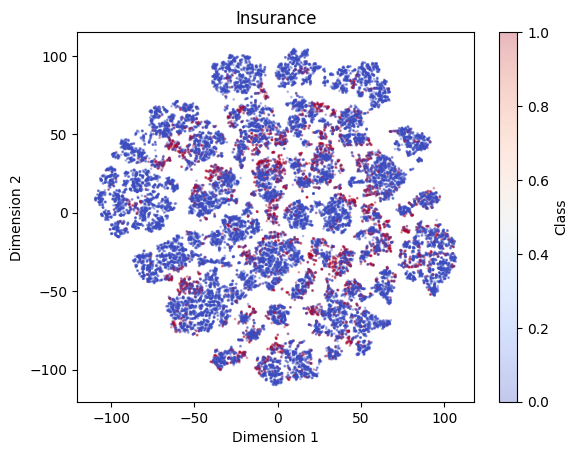

In [ ]:


import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

features = X
labels =y

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Insurance')
plt.colorbar(label='Class')
plt.show()


In [ ]:


start1 = time.time()



#Training XGBoost
#classifier = XGBClassifier(eta=0.3, max_depth = 4, gamma=0, min_child_weight=1)
classifier = XGBClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============XGBoost Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

import math

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end1 = time.time()

print("The time of execution of xgboost:",
      (end1-start1), "s")

===============XGBoost Performance====================
F1 score: 0.945
STD F1 Score: 0.002
Recall: 0.944
Specitifity: 0.951
AUC ROC: 0.990
G-Mean: 0.947
The time of execution of xgboost: 147.44654035568237 s


In [ ]:

start2 = time.time()
classifier=KNeighborsClassifier()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============KNN Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end2 = time.time()
print("The time of execution of knn:",
      (end2-start2), "s")

===============KNN Performance====================
F1 score: 0.922
STD F1 Score: 0.001
Recall: 0.985
Specitifity: 0.847
AUC ROC: 0.963
G-Mean: 0.913
The time of execution of knn: 60.62499237060547 s


In [ ]:

start4 = time.time()
classifier=DecisionTreeClassifier()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============DT Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end4 = time.time()
print("The time of execution of dt:",
      (end4-start4), "s")

===============DT Performance====================
F1 score: 0.901
STD F1 Score: 0.002
Recall: 0.911
Specitifity: 0.888
AUC ROC: 0.901
G-Mean: 0.899
The time of execution of dt: 7.6908392906188965 s


In [ ]:
start5 = time.time()
classifier=GaussianNB()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============NB Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end5 = time.time()
print("The time of execution of NB:",
      (end5-start5), "s")

===============NB Performance====================
F1 score: 0.763
STD F1 Score: 0.003
Recall: 0.921
Specitifity: 0.505
AUC ROC: 0.834
G-Mean: 0.682
The time of execution of NB: 1.1291701793670654 s


In [ ]:
start3=time.time()

classifier = GradientBoostingClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============GBM Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))


gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end3 = time.time()
print("The time of execution of gbm:",
      (end3-start3), "s")


===============GBM Performance====================
F1 score: 0.905
STD F1 Score: 0.004
Recall: 0.923
Specitifity: 0.882
AUC ROC: 0.969
G-Mean: 0.902
The time of execution of gbm: 188.38053965568542 s


In [ ]:
start2 = time.time()
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============Random Forest Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

import math

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end2 = time.time()

print("The time of execution of Random Forest:",
      (end2-start2), "s")

===============Random Forest Performance====================
F1 score: 0.941
STD F1 Score: 0.003
Recall: 0.963
Specitifity: 0.916
AUC ROC: 0.987
G-Mean: 0.939
The time of execution of Random Forest: 161.68191123008728 s


In [ ]:
start3 = time.time()
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,algorithm='SAMME.R')

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============ADABoost Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

import math

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')
end3 = time.time()

print("The time of execution of ADABoost:",
      (end3-start3), "s")

In [ ]:
#SMOTE
#avg execution time = 10-15 sec

#SMOTE ENN
#avg execution time = 8-10 sec

#SMOTE NCR
#avg execution time = 9-10 sec

#SMOTE TOMEK
#avg execution time = 10-20 sec